# CHW 2
# Mohammad Amin Rami
## 98101588


                                       Mahyar Ghazanfari 98102057

# Problem 1

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

rho = [0.1, 1, 10, 100]

N = np.array([0, 4, 2, 2, 3, 0, 4, 5, 6, 6, 4, 1, 4, 4, 0, 1, 3, 4, 2, 0, 3, 2, 0, 1])

constraints = []
opt = []
lamda = cp.Variable(np.size(N))

fig = plt.figure(figsize=(15, 5))

for i in rho:
    objective = cp.Minimize(cp.sum(lamda)
                            - cp.sum(cp.multiply(N, cp.log(lamda)))
                            + i * cp.sum_squares(lamda[:-1]
                            - lamda[1:]))
                            
    problem = cp.Problem(objective, constraints)
    result = problem.solve()
    opt.append(np.sum(lamda.value) - np.sum(N * np.log(lamda.value)))
    plt.plot(np.arange(np.size(N)), lamda.value)

plt.xlabel('t', size = 13)
plt.ylabel(r'$\lambda(t)$', size = 13)
plt.title(r'$\lambda(t)$'+ '  VS  t', size = 13)    
plt.show()    

fig = plt.figure(figsize=(15, 5))
plt.xlabel(r'$\rho $', size = 13)
plt.ylabel('Optimal values', size = 13)
plt.title('Optimal values per each '+ r'$\rho $', size = 13)
plt.plot(rho, opt, 'o', color = 'black')
plt.show()


ModuleNotFoundError: No module named 'cvxpy'

# Problem 2

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Defining parameters as said in question 

A = np.array([[1, 2, 0, 1],
              [0, 0, 3, 1],
              [0, 3, 1, 1],
              [2, 1, 2, 5],
              [1, 0, 3, 2]])

c_max = np.array([100, 100, 100, 100, 100])

p = np.array([3, 2, 7, 6])

q = np.array([4, 10, 5, 10])

p_disc = np.array([2, 1, 4, 2])

n = 4

x = cp.Variable(n)

# Constructing the problem

alpha1 = cp.multiply(p, x)
alpha2 = cp.multiply(p, q) + cp.multiply(p_disc, x - q)
objective = cp.Maximize(cp.sum(cp.minimum(alpha1, alpha2)))
constraints = [x >= 0, A*x <= c_max]
prob = cp.Problem(objective, constraints)
prob.solve()

# Solving the problem

r = cp.minimum(alpha1, alpha2).value
total_r = sum(r)
avg_price = r / x.value

# Displaying the results

print('x.value is : ',x.value)
print()
print('r is :',r)
print()
print('totla r is :',total_r)
print()
print('average_price is :',avg_price)


x.value is :  [ 3.99999996 22.49999989 30.99999995  1.50000005]

r is : [ 11.99999989  32.49999989 138.99999981   9.00000032]

totla r is : 192.49999991412406

average_price is : [3.         1.44444445 4.48387097 6.        ]


c:\users\maram\appdata\local\programs\python\python37\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


# Problem 3

Text(0.5, 1.0, 'Speed in each segment')

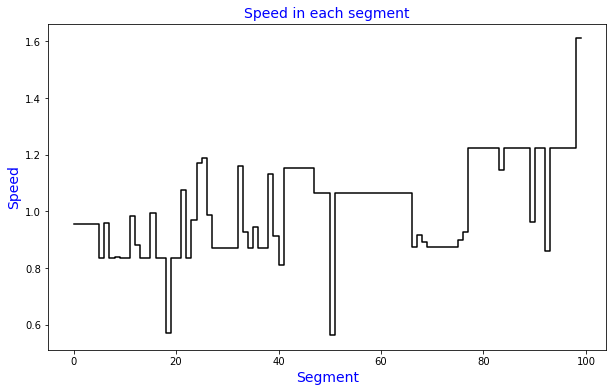

In [73]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from veh_speed_sched_data import *

# Defining objective function

time = cp.Variable(n)
objective = cp.sum(a*cp.multiply(cp.square(d), cp.inv_pos(time))+c*time+b*d)

# Defining constraints:

constraints = [tau_min[j] <= cp.sum(time[0:j+1]) for j in range(n)]
constraints += [tau_max[j] >= cp.sum(time[0:j+1]) for j in range(n)]
constraints += [time >= d/smax, time <= d/smin]

# Solving the problem:

cp.Problem(cp.Minimize(objective), constraints).solve()
speeds = d/time.value

# Plotting the result

plt.figure(figsize=(10,6))
plt.step(range(n),speeds,color = 'black');
plt.xlabel('Segment', size = 14, color ='blue')
plt.ylabel('Speed', size = 14, color = 'blue')
plt.title('Speed in each segment', size = 14, color = 'blue')


# Problem 4


In [74]:
import cvxpy as cp

Part 1: Domain of 1/x must be real and positive, otherwise 1/x will not be convex.


In [75]:
x = cp.Variable()
y = cp.Variable()
constraint = [cp.inv_pos(x) + cp.inv_pos(y) <= 1]

Part 2: xy is not concave, we can rewrite the constraints as below:

In [76]:
x = cp.Variable()
y = cp.Variable()
constraint = [x >= cp.inv_pos(y), x>=0]

Part 3: We can write constraints as below.This works because quad_over_lin constraint that we used is monotone decreasing in the second argument, so it can accept a concave function here, and sqrt is concave.

In [77]:
x = cp.Variable()
y = cp.Variable()
constraint = [cp.quad_over_lin(x + y, cp.sqrt(y))-x+y <= 5, y >= 0]

part 4: Here xy is not concave so CVX rejects the statement. Using geomean like below we can reformulate the constraints so that it works.

In [78]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()
constraint = [x + z <= 1 + cp.geo_mean(cp.vstack([x - cp.quad_over_lin(z,y), y]))]